### Bonus 1:
Sestav model s využitím robustní regrese. Opět proveď vyřazení koeficinetů, které nejsou statisticky významné, a sestav model pouze s významnými koeficienty. Vlož odhady cen do původních dat a opět najdi potenciálně nejvíce podhodnocenou akcii. Jde v případě robustní regese o stejnou akcii, nebo se akcie liší?

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

data = pd.read_csv("df.csv")
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical


Regresním modelům vadí i další věc, která se označuje strašidelným pojmem heteroskedasticita (*heteroscedasticity*). Tím je myšleno, že data mají stejnou variabilitu.

Pokud máme podezření na heteroskedasticitu, můžeme použít jiný typ regrese, která je označovaná jako robustní regrese. Ta přiřazuje jednotlivým pozorováním různé váhy, čímž vykompenzuje vliv měnící se variability dat. Robustní regrese je alternativním řešením i pro odlehlá pozorování, protože dává menší váhu odlehlejším pozorováním a tím zeslabí jejich vliv na regresní funkci.

In [2]:
formula = "Y ~ CR + DA + FL + OPM + RT + TAT + DE + PT"

# Vytvoření a trénovámí modelu pomocí formuláře
mod = smf.rlm(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      Y   No. Observations:                  100
Model:                            RLM   Df Residuals:                       91
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 25 Nov 2023                                         
Time:                        08:45:25                                         
No. Iterations:                    37                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4961      3.453     -3.039      0.002     -17.265      -3.728
CR             2.0316      0.801      2.537      0.011       0.462       3.601
DA            -0.4762      6.052     -0.079      0.937     -12.338      11.386
FL             3.6694      0.685      5.360      0.000       2.328       5.011
OPM           16.3810      5.216      3.140      0.002       6.158      26.604
RT            -0.0029      0.014     -0.216      0.829      -0.029       0.024
TAT            5.2670      1.518      3.469      0.001       2.291       8.243
DE            -2.5507      1.335     -1.911      0.056      -5.166       0.065
PT            -0.0878      0.062     -1.412      0.158      -0.210       0.034
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [3]:
formula = "Y ~ CR + FL + OPM + TAT"

mod = smf.rlm(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      Y   No. Observations:                  100
Model:                            RLM   Df Residuals:                       95
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 25 Nov 2023                                         
Time:                        08:45:25                                         
No. Iterations:                    23                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.9579      1.924     -5.176      0.000     -13.729      -6.187
CR             2.0977      0.681      3.081      0.002       0.763       3.432
FL             2.4422      0.123     19.840      0.000       2.201       2.683
OPM           13.9913      4.560      3.068      0.002       5.054      22.929
TAT            5.3858      1.290      4.176      0.000       2.858       7.913
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

#### Graf distribuce reziduí

<AxesSubplot: ylabel='Count'>

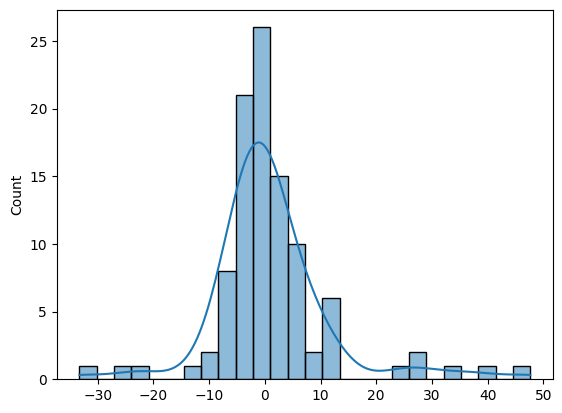

In [4]:
sns.histplot(res.resid, kde=True)

In [5]:
data["Y_Predicted"] = res.predict(data)
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Y_Predicted
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,1.167348
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,20.203407
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,7.832927
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,11.557664
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,-0.085471


In [6]:
data["Y_difference"] = data["Y_Predicted"] - data["Y"]
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Y_Predicted,Y_difference
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,1.167348,-0.782652
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,20.203407,12.943407
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,7.832927,0.052927
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,11.557664,5.387664
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,-0.085471,-0.085471


#### Regresní graf predikovaných a skutečných hodnot

<AxesSubplot: xlabel='Y_Predicted', ylabel='Y'>

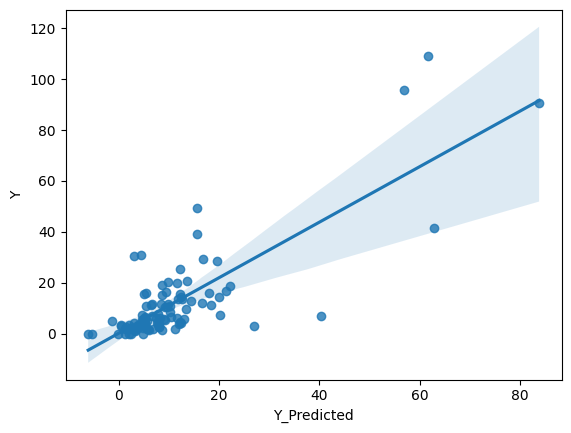

In [7]:
sns.regplot(data, x="Y_Predicted", y="Y")

In [8]:
top_5_Y_differences = data.sort_values(by="Y_difference", ascending=False)
top_5_Y_differences.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Y_Predicted,Y_difference
79,SYXLy,0.76,0.37,18.64,0.0631,12.44,0.41,6.93,6.97,3.40,Industrials,40.250244,33.280244
6,6qLRA,1.19,0.49,13.56,-0.0415,14.81,0.36,6.69,3.06,4.63,Industrials,27.013046,23.953046
98,YX515,2.30,0.64,25.03,0.3758,7.48,0.31,16.08,41.57,10.54,Technology,62.922966,21.352966
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,20.203407,12.943407
24,Cdr0m,1.26,0.24,3.14,0.0187,11.43,1.97,0.75,1.91,8.87,Energy,11.225472,9.315472


S využitím robustní regrese je nejvíce podhodnocenou akcií ta na řádku 79, tedy stejná jako v předchozím případě.